# Using deep features to train an image classifier

In [1]:
import turicreate as tc

# Load some data

In [2]:
image_train = tc.SFrame('data/image_train_data/')
image_test = tc.SFrame('data/image_test_data/')

# Explore this image data

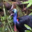

In [4]:
image_train['image'][0]

# Train an image classifier on raw image pixels

In [5]:
raw_pixel_model = tc.logistic_classifier.create(image_train,
                                                target = 'label',
                                                features = ['image_array'], 
                                                seed=0)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.072337  | 1.244606     | 0.375000          | 0.366337            |

| 1         | 8        | 0.361687  | 1.416991     | 0.383403          | 0.346535            |

| 2         | 10       | 0.361687  | 1.546759     | 0.405462          | 0.386139            |

| 3         | 12       | 0.361687  | 1.674334     | 0.430672          | 0.425743            |

| 4         | 13       | 0.452109  | 1.765315     | 0.443277          | 0.415842            |

| 9         | 18       | 1.000000  | 2.206811     | 0.519958          | 0.366337            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions using simple raw pixel model

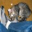

In [6]:
image_test[0]['image']

In [7]:
image_test[0]['label']

'cat'

In [8]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluate the raw pixel model on the test data

In [9]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.4785,
 'auc': 0.7118264166666666,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       dog       |  137  |
 |     dog      |       cat       |  246  |
 |     cat      |       cat       |  347  |
 |     dog      |    automobile   |   77  |
 |     dog      |       dog       |  381  |
 |     cat      |       dog       |  245  |
 |     bird     |    automobile   |   87  |
 |  automobile  |    automobile   |  594  |
 |     bird     |       cat       |  184  |
 |     cat      |    automobile   |  121  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.47746452330448125,
 'log_loss': 1.2469852106364125,
 'precisio

# Train image classifier using deep features

In [13]:
image_train.shape[0]

2005

In [14]:
image_train.head(2)

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."


# Given the deep features, train a logistic classifier

In [15]:
deep_features_model = tc.logistic_classifier.create(image_train,
                                                    target='label',
                                                    features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.268926     | 0.745273          | 0.663366            |

| 1         | 6        | 0.250000  | 0.616040     | 0.775210          | 0.762376            |

| 2         | 8        | 0.304300  | 0.887187     | 0.776786          | 0.762376            |

| 3         | 12       | 0.912900  | 1.316751     | 0.765231          | 0.722772            |

| 4         | 14       | 1.000000  | 1.588303     | 0.803571          | 0.742574            |

| 9         | 22       | 0.976563  | 2.772848     | 0.933298          | 0.772277            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features classifier on the first few images

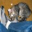

In [18]:
image_test['image'][0]

In [20]:
image_test['label'][0]

'cat'

In [19]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Quantitatively evaluate deep features classifier on test data

In [21]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.794,
 'auc': 0.942758166666668,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       dog       |   41  |
 |     dog      |       cat       |  203  |
 |     dog      |    automobile   |   11  |
 |     cat      |       bird      |   92  |
 |  automobile  |       dog       |   7   |
 |     dog      |       bird      |   64  |
 |     cat      |    automobile   |   26  |
 |     cat      |       cat       |  660  |
 |     bird     |       cat       |  112  |
 |     cat      |       dog       |  222  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7937331248459303,
 'log_loss': 0.5840546223530734,
 'precision':